## 1. Data generator


In [68]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math



In [69]:
def generate_clustered_data(n_samples, d, k, radius, relevant_dims_per_cluster,n_outliers):
    """
    Generate clustered data.

    Parameters:
    - n_samples: Total number of data points.
    - d: Dimensionality of the data.
    - k: Number of clusters.
    - radius: Radius within which points are uniformly distributed around the cluster center in relevant dimensions.
    - relevant_dims_per_cluster: List of integers indicating the number of relevant dimensions for each cluster.
    - n_outliers: Total number of outliers.

    Returns:
    - data: Generated data points as an array of shape (n_samples, d).
    - labels: Cluster labels for each data point, outliers have label -1
    """
    # Ensure the input is valid
    assert len(relevant_dims_per_cluster) == k, "relevant_dims_per_cluster must have length equal to k"

    # Initialize data array and labels
    data = np.zeros((n_outliers,d))
    labels = np.zeros(n_samples+n_outliers, dtype=int)

     #Generate outliers
    for j in range(n_outliers):

        point = np.random.uniform(0, 100, d)
        data[j]=point
        labels[j]=-1   

    # Total number of samples per cluster
    samples_per_cluster = n_samples //  k

    # Generate clusters
    for i in range(k):

        if i!=k-1:
            data =np.vstack((data, generate_cluster(samples_per_cluster, d, radius, relevant_dims_per_cluster[i])) )
            labels[n_outliers+ i * samples_per_cluster: n_outliers+ (i+1) * samples_per_cluster] = i
        else:
        # Handle case where n_samples is not perfectly divisible by k
            remaining_samples = n_samples - samples_per_cluster * k
            data = np.vstack((data, generate_cluster(samples_per_cluster+remaining_samples, d, radius, relevant_dims_per_cluster[i]))) 
            labels[n_outliers+ i * samples_per_cluster: n_outliers+ samples_per_cluster+remaining_samples] = i   

    
    

    return data, labels



#Generate a cluster
def generate_cluster(samples, d, radius, relevant_dims):
    
    # Generate the cluster center within the full-dimensional space
    center = np.random.uniform(0, 100, d)

    # Determine relevant dimensions for this cluster
    relevant_dims = np.random.choice(d,relevant_dims, replace=True)

    data = np.zeros((samples, d))

    for j in range(samples):

        point = np.random.uniform(0, 100, d)
            
        # In relevant dimensions, distribute points within the specified radius
        for dim in relevant_dims:
            point[dim] = np.random.uniform(max(0, center[dim] - radius), min(100, center[dim] + radius))
            
        data[j]=point    

    return data



#save generated data to excel

In [70]:
def save_data(data, labels):
    
    data_file="dataset_of_points1.csv"
    labels_file="labels_of_points1.csv"
    df_data = pd.DataFrame(data)
    df_label = pd.DataFrame(labels)
    
    with open(data_file, 'a') as file:
        # Write data
        df_data.to_csv(file,index=False)
    
    with open(labels_file, 'a') as file:
        # Write labels
        df_data.to_csv(file,index=False)




In [71]:
# with the data generator create five datasets with increasing dimensionality d, vary d between 1 and 100.


data4, labels4 = generate_clustered_data(n_samples = 500, d = 4, k = 5, radius = 5, relevant_dims_per_cluster = [2, 3, 1, 5, 5] ,n_outliers=10)
data8, labels8 = generate_clustered_data(n_samples = 500, d = 8, k = 5, radius = 5, relevant_dims_per_cluster = [2, 3, 1, 5, 5] ,n_outliers=10)
data16, labels16 = generate_clustered_data(n_samples = 500, d = 16, k = 5, radius = 5, relevant_dims_per_cluster = [2, 3, 1, 5, 5] ,n_outliers=10)
data32, labels32 = generate_clustered_data(n_samples = 500, d = 32, k = 5, radius = 5, relevant_dims_per_cluster = [2, 3, 1, 5, 5] ,n_outliers=10)
data64, labels64 = generate_clustered_data(n_samples = 500, d = 64, k = 5, radius = 5, relevant_dims_per_cluster = [2, 3, 1, 5, 5] ,n_outliers=10)

#shuffle the ordered data (not necessary)

In [40]:
# Ensure both arrays have the same length
assert len(data) == len(labels)

# Generate a set of indices and shuffle them
indices = np.arange(len(labels))
np.random.shuffle(indices)

# Use the shuffled indices to reorder the arrays
shuffled_data = data[indices]
shuffled_labels = labels[indices]

save_data(shuffled_data,shuffled_labels = labels[indices]
)


Shuffled Array 1: [[93.76348971 42.10640045  6.46045847 35.57681043 97.50469045]
 [13.86706417 66.02475878 99.24292755  6.22973604  4.29997164]
 [76.36408838 50.0091254  95.76528146 18.41297677  0.69973361]
 [44.32818181 67.68147146 96.02972268  0.93382031 54.47536132]
 [98.25686889 99.13120031 74.26584442 37.85866038 89.43012468]]
Shuffled Array 2: [1 0 0 0 1]


## 2. Analysis of high dimensional data
Step 1: Compute the Pairwise Euclidean Distances: For each object in the dataset, calculate the Euclidean distance to every other object.

Step 2: Determine Nearest and Farthest Neighbors: For each object, identify the nearest neighbor (the object with the smallest distance) and the farthest neighbor (the object with the largest distance).

Step 3: Calculate the Ratio for Each Object: For each object, compute the ratio of the distance to the farthest neighbor to the distance to the nearest neighbor.

Step 4: Calculate the Average Ratio: Compute the average of these ratios for all objects in the dataset.

Step 5: Draw a graph, the abscissa is the number of dimensions, the ordinate is the nearest and farthest distance and their ratio

In [72]:
import matplotlib.pyplot as plt
import numpy as np

#Step 1: Compute the Pairwise Distances
def euclidean_distance_matrix(data):
    n = data.shape[0]
    dist_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            #dist_matrix[i, j] = np.linalg.norm(data[i] - data[j])   #Euclidean Distances
            dist_matrix[i, j]=sum(abs(a - b) for a, b in zip(data[i] , data[j])) #Manhattan distance
    
    return dist_matrix

#Step 2: Determine Nearest and Farthest Neighbors
def nearest_and_farthest_neighbors(dist_matrix):
    n = dist_matrix.shape[0]
    nearest_neighbors = np.zeros(n)
    farthest_neighbors = np.zeros(n)
    
    for i in range(n):
        distances = dist_matrix[i]
        nearest_neighbors[i] = np.min(distances[distances > 0])  # Nearest neighbor (excluding self)
        farthest_neighbors[i] = np.max(distances)  # Farthest neighbor
    
    return nearest_neighbors, farthest_neighbors

#Step 3: Calculate the Ratio for Each Object
def calculate_ratio(nearest_neighbors, farthest_neighbors):
    ratios = farthest_neighbors / nearest_neighbors
    return ratios

#Step 4: Calculate the Average Ratio
def calculate_ave_ratio(ratios):
    average_ratio = np.mean(ratios)
    return average_ratio

#step 1-4
def compute_distances_and_average_ratio(data):
    dist_matrix = euclidean_distance_matrix(data)
    nearest_neighbors, farthest_neighbors = nearest_and_farthest_neighbors(dist_matrix)
    ratios = calculate_ratio(nearest_neighbors, farthest_neighbors)
    average_ratio = calculate_ave_ratio(ratios)
    nearest_neighbor=np.mean(nearest_neighbors)
    farthest_neighbor=np.mean(farthest_neighbors)
    return nearest_neighbor,farthest_neighbor, average_ratio

#Step 5:
def make_figure_of_average_ratio(x,average_ratios):
    
    plt.plot(x, average_ratios)
    
    plt.xlabel("number of dimensions")
    plt.ylabel("average_ratio")
    plt.show()

def make_figure_of_distances(x, nearest_neighbors, farthest_neighbors):

    plt.plot(x, nearest_neighbors,label='nearest_neighbors')

    plt.plot(x, farthest_neighbors, '-.', label='farthest_neighbors')
    
    plt.legend()
    plt.xlabel("number of dimensions")
    plt.ylabel("distance")
    plt.show()


In [73]:
data4 
data8
data16
data32
data64

x=[4,8,16,32,64]
average_ratios=[0,0,0,0,0]
nearest_neighbors=[0,0,0,0,0]
farthest_neighbors=[0,0,0,0,0]

nearest_neighbors[0],farthest_neighbors[0], average_ratios[0]=compute_distances_and_average_ratio(data4)
nearest_neighbors[1],farthest_neighbors[1], average_ratios[1]=compute_distances_and_average_ratio(data8)
nearest_neighbors[2],farthest_neighbors[2], average_ratios[2]=compute_distances_and_average_ratio(data16)
nearest_neighbors[3],farthest_neighbors[3], average_ratios[3]=compute_distances_and_average_ratio(data32)
nearest_neighbors[4],farthest_neighbors[4], average_ratios[4]=compute_distances_and_average_ratio(data64)


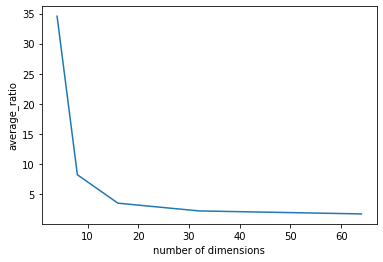

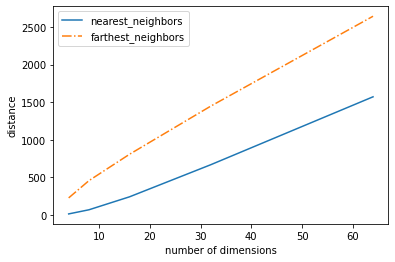

In [74]:
make_figure_of_average_ratio(x,average_ratios)
make_figure_of_distances(x, nearest_neighbors, farthest_neighbors)